# K-function analysis exploration

In [1]:
import csv
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

### Loading a single radial scan

In [2]:
fn = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0806_Pos3_Scr-12_N_cells_wt_rad_1600_t_range_1600_focal_t_870.csv'

In [3]:
df = pd.read_csv(fn)
print(df)

          (91   939.16     70)
0         (95   389.97     70)
1         (97   293.87     70)
2         (99   304.96     70)
3        (100   578.81     70)
4        (102   493.00     70)
...       ...      ...     ...
674902  (8266  1080.91   1073)
674903  (8265  1205.93   1073)
674904  (8264  1182.22   1073)
674905  (8262  1296.27   1073)
674906  (8261   766.89   1073)

[674907 rows x 3 columns]


In [4]:
df.columns= ['Cell ID', 'Distance', 'Time']

In [5]:
### tidy up dataframe
df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
df['Time'] = df['Time'].str.replace('[()]', '')
df = df.astype(int)

<ipython-input-5-f01488c4c9bd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-5-f01488c4c9bd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [6]:
df

,Cell ID,Distance,Time
0,95,389,70
1,97,293,70
2,99,304,70
3,100,578,70
4,102,493,70
...,...,...,...
674902,8266,1080,1073
674903,8265,1205,1073
674904,8264,1182,1073
674905,8262,1296,1073


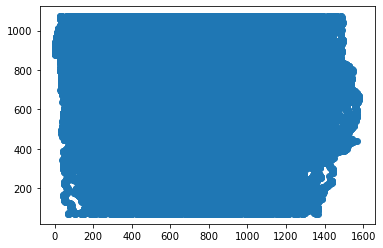

In [7]:
plt.clf()
plt.scatter(df['Distance'], df['Time'])
plt.show()

#### Now with divisions

In [8]:
fn = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos7_Scr-5_N_events_wtdiv_rad_1600_t_range_1600_focal_t_204.csv'

In [9]:
df = pd.read_csv(fn)
print(df)

       (80   681.24   477)
0      (79   645.20   262)
1      (78  1123.05    79)
2      (77  1006.30   213)
3      (75   895.46    97)
4      (73  1115.29   132)
..     ...      ...    ...
875  (3934   473.37   940)
876  (4061   766.85   970)
877  (4066  1450.89   963)
878  (4085   440.03   986)
879  (4184  1392.31   982)

[880 rows x 3 columns]


In [10]:
df.columns= ['Cell ID', 'Distance', 'Time']

In [11]:
### tidy up dataframe
df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
df['Time'] = df['Time'].str.replace('[()]', '')
df = df.astype(int)

<ipython-input-11-f01488c4c9bd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-11-f01488c4c9bd>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [12]:
df

,Cell ID,Distance,Time
0,79,645,262
1,78,1123,79
2,77,1006,213
3,75,895,97
4,73,1115,132
...,...,...,...
875,3934,473,940
876,4061,766,970
877,4066,1450,963
878,4085,440,986


#### Exploring K functions (specifically, complete spatial randomness)

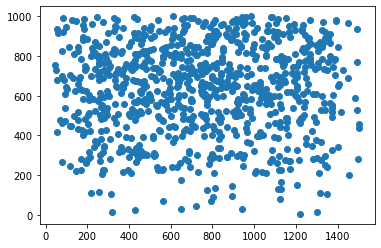

In [13]:
plt.clf()
plt.scatter(df['Distance'], df['Time'])
#plt.ylim(100,1000)
#plt.yticks(np.arange(250,950,50))
plt.show()

In [14]:
### just divisions that occur at apop time
apop_time_div = df.loc[df['Time'] == 204]
apop_time_div

,Cell ID,Distance,Time


In [15]:
apop_time = 204
t_range = 100

In [17]:
apop_time_div = df.loc[df['Time'].isin([time for time in range(apop_time-t_range,apop_time+t_range)])]

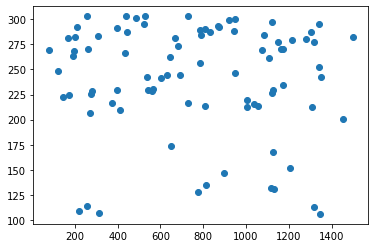

In [18]:
plt.clf()
plt.scatter(apop_time_div['Distance'], apop_time_div['Time'])
#plt.ylim(100,1000)
#plt.yticks(np.arange(250,950,50))
plt.show()

In [19]:
### csr
apop_time_div['Kt_csr'] = np.pi * (apop_time_div['Distance'])**2

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [20]:
apop_time_div

,Cell ID,Distance,Time,Kt_csr
0,79,645,262,1.306981e+06
2,77,1006,213,3.179405e+06
4,73,1115,132,3.905707e+06
5,72,920,299,2.659044e+06
6,71,1206,152,4.569245e+06
...,...,...,...,...
180,463,1350,242,5.725553e+06
201,521,1214,279,4.630067e+06
209,530,787,289,1.945805e+06
216,540,1500,282,7.068583e+06


In [21]:
### wrong method
apop_time_div['Lt'] = np.sqrt((np.pi * (apop_time_div['Distance'])**2)/np.pi)

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


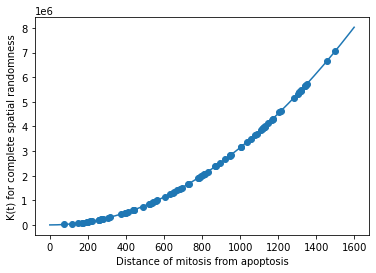

In [22]:
plt.scatter(apop_time_div['Distance'], apop_time_div['Kt_csr'])
x = range(0,1600)
y = [np.pi*xi**2 for xi in x]
plt.plot(x, y)
#plt.scatter(apop_time_div['Distance'], apop_time_div['Lt'])
plt.xlabel('Distance of mitosis from apoptosis')
plt.ylabel('K(t) for complete spatial randomness')
plt.show()

## Developing K-function exploration using seaborn

In [23]:
import seaborn

In [24]:
db = apop_time_div

<Figure size 432x288 with 0 Axes>

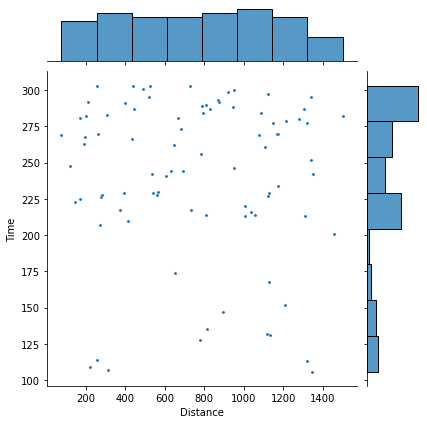

In [25]:
plt.clf()
seaborn.jointplot(x='Distance', y='Time', data=db, s=10);
plt.show()

<Figure size 432x288 with 0 Axes>

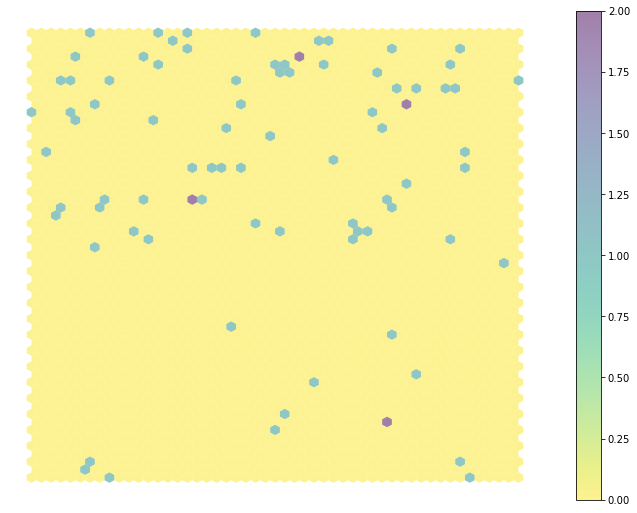

In [26]:
plt.clf()
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 9))
# Generate and add hexbin with 50 hexagons in each 
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    db['Distance'], 
    db['Time'],
    gridsize=50, 
    linewidths=0,
    alpha=0.5, 
    cmap='viridis_r'
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

plt.show()

### Using KDE (kernel density estimation) plots 

Akin to plotting spatiotemporal graphs but without predetermined bin sizes

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance', ylabel='Time'>

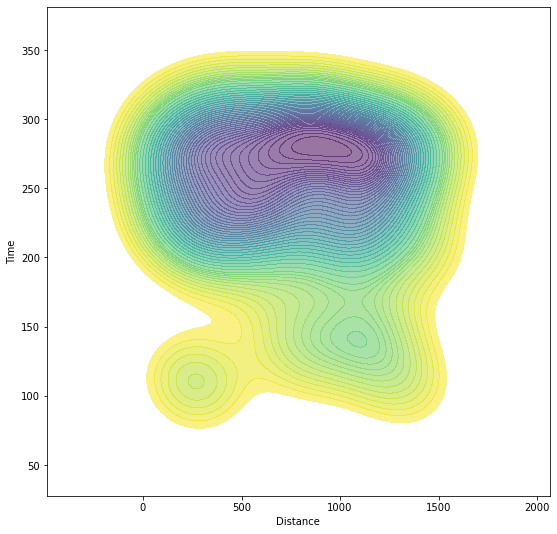

In [27]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    db['Distance'], 
    db['Time'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# # Add basemap
# contextily.add_basemap(
#     ax, 
#     source=contextily.providers.CartoDB.Positron
#)
# Remove axes
#ax.set_axis_off()


In [28]:
db['Time (norm)'] = db['Time'] - 206

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [29]:
db

,Cell ID,Distance,Time,Kt_csr,Lt,Time (norm)
0,79,645,262,1.306981e+06,645.0,56
2,77,1006,213,3.179405e+06,1006.0,7
4,73,1115,132,3.905707e+06,1115.0,-74
5,72,920,299,2.659044e+06,920.0,93
6,71,1206,152,4.569245e+06,1206.0,-54
...,...,...,...,...,...,...
180,463,1350,242,5.725553e+06,1350.0,36
201,521,1214,279,4.630067e+06,1214.0,73
209,530,787,289,1.945805e+06,787.0,83
216,540,1500,282,7.068583e+06,1500.0,76


/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time (norm)', ylabel='Distance'>

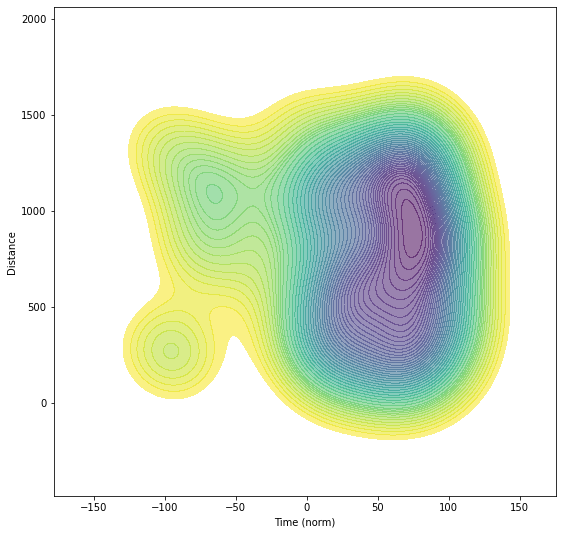

In [30]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    db['Time (norm)'], 
    db['Distance'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
# # Add basemap
# contextily.add_basemap(
#     ax, 
#     source=contextily.providers.CartoDB.Positron
#)
# Remove axes
#ax.set_axis_off()

In [2]:
dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon'

In [3]:
dirname

'/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon'

In [4]:
files = glob.glob(os.path.join(dirname, '*events*.csv'))

In [5]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0815_Pos12_Scr-59_N_events_wtdiv_rad_1600_t_range_1600_focal_t_732.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0805_Pos5_Scr-1050_N_events_wtdiv_rad_1600_t_range_1600_focal_t_648.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0797_Pos20_Scr-146_N_events_wtdiv_rad_1600_t_range_1600_focal_t_562.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos24_Scr-946_N_events_wtdiv_rad_1600_t_range_1600_focal_t_905.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0819_Pos2_Scr-491_N_events_wtdiv_rad_1600_t_range_1600_focal_t_1056.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0795_Pos3_Scr-167_N_events_wtdiv_rad_1600_t_range_1600_focal_t_742.csv',
 '/home/nathan/data/results/radial_analysi

In [6]:
re.search('t_(\d+)', files[0]).group(1)

'732'

### Cumulative KDE measures 

In [7]:
cumu_df = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files):
    df = pd.read_csv(file)
    df.columns= ['Cell ID', 'Distance', 'Time']
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    cumu_df.append(df)
cumu_df = pd.concat(cumu_df, axis = 0, ignore_index = True)

  0%|          | 0/1839 [00:00<?, ?it/s]

<ipython-input-7-5f134d9acb67>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-7-5f134d9acb67>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [9]:
cumu_df

,Cell ID,Distance,Time
0,19,788,-516
1,20,901,-533
2,23,766,-367
3,24,445,-294
4,2,926,-591
...,...,...,...
474495,3309,1195,508
474496,3414,511,521
474497,3425,1114,519
474498,3433,1110,531


In [137]:
len(cumu_df)

474500

# Cumulative KDE for divisions (frames/pixels)

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='Distance'>

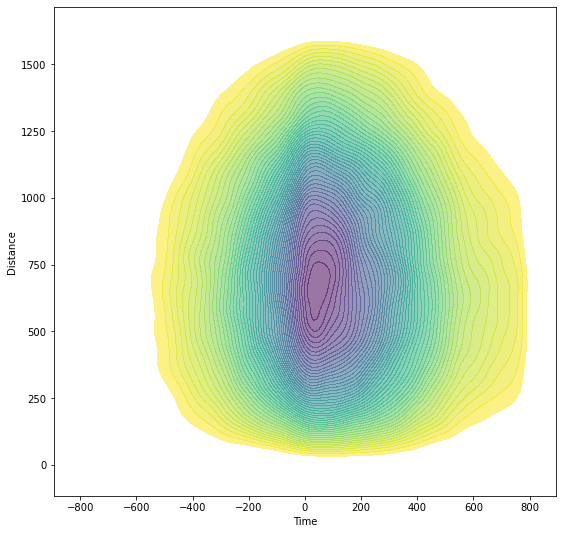

In [142]:
## takes a good couple of minutes
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    cumu_df['Time'], 
    cumu_df['Distance'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)

In [8]:
cumu_df['Time (hrs)'] = cumu_df['Time']*(4/60)
cumu_df['Distance (μm)'] = cumu_df['Distance']/3

In [9]:
cumu_df

,Cell ID,Distance,Time,Time (hrs),Distance (μm)
0,19,788,-516,-34.400000,262.666667
1,20,901,-533,-35.533333,300.333333
2,23,766,-367,-24.466667,255.333333
3,24,445,-294,-19.600000,148.333333
4,2,926,-591,-39.400000,308.666667
...,...,...,...,...,...
474495,3309,1195,508,33.866667,398.333333
474496,3414,511,521,34.733333,170.333333
474497,3425,1114,519,34.600000,371.333333
474498,3433,1110,531,35.400000,370.000000


# Cumulative KDE for divisions (hours/ums)

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time (hrs)', ylabel='Distance (μm)'>

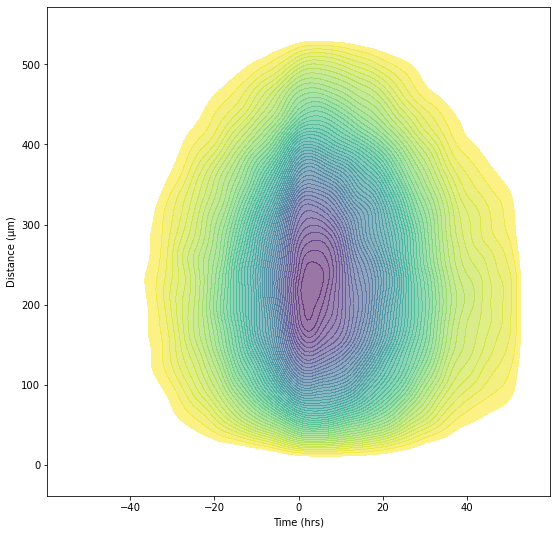

In [145]:

f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    cumu_df['Time (hrs)'], 
    cumu_df['Distance (μm)'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)

### Discussion of above graph (N_events KDE distribution)

The peak then fall along the x axis, temporally, of the distribution of wild-type divisions around focal scribble apoptoses is most likely a result of the underlying distribution of scribble apoptoses. Scr. apops. happen more towards the end of the movies so there is likely to be fewer and fewer divisions at greater and greater time points since t = 0. However, this does not account for the marked asymmetry around the central t = 0 time point. Or does it? Uhhhhh. Comparing to the control plot (2 plots down) it seems like there might be a spatial constraint on the distribution of wild-type mitoses...

# The same but with 90:10 expt ratios to save memory

In [39]:
dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/'

In [40]:
files = glob.glob(os.path.join(dirname, '*events*.csv'))

In [129]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0801_Pos3_Scr-198_N_cells_wt_rad_1600_t_range_1600_focal_t_688.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0800_Pos3_Scr-65_N_cells_wt_rad_1600_t_range_1600_focal_t_1053.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0800_Pos15_Scr-7_N_cells_wt_rad_1600_t_range_1600_focal_t_848.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0802_Pos3_Scr-16_N_cells_wt_rad_1600_t_range_1600_focal_t_888.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0800_Pos8_Scr-75_N_cells_wt_rad_1600_t_range_1600_focal_t_546.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0798_Pos8_Scr-8_N_cells_wt_rad_1600_t_range_1600_focal_t_816.csv',
 '/home/n

In [125]:
cumu_df = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files):
    df = pd.read_csv(file)
    df.columns= ['Cell ID', 'Distance', 'Time']
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    cumu_df.append(df)
cumu_df = pd.concat(cumu_df, axis = 0, ignore_index = True)

  0%|          | 0/129 [00:00<?, ?it/s]

<ipython-input-125-5f134d9acb67>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-125-5f134d9acb67>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [126]:
len(cumu_df)

45848141

In [127]:
cumu_df['Time (hrs)'] = cumu_df['Time']*(4/60)
cumu_df['Distance (μm)'] = cumu_df['Distance']/3

In [128]:
cumu_df

,Cell ID,Distance,Time,Time (hrs),Distance (μm)
0,61,1131,-20,-1.333333,377.000000
1,136,283,-20,-1.333333,94.333333
2,153,1477,-20,-1.333333,492.333333
3,205,502,-20,-1.333333,167.333333
4,278,1366,-20,-1.333333,455.333333
...,...,...,...,...,...
45848136,3805,1094,753,50.200000,364.666667
45848137,3815,881,753,50.200000,293.666667
45848138,3816,234,753,50.200000,78.000000
45848139,3817,817,753,50.200000,272.333333


# Canonical 90:10 KDE plot

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of wild-type mitoses around Scribble apoptoses in 90:10 ratio expts')

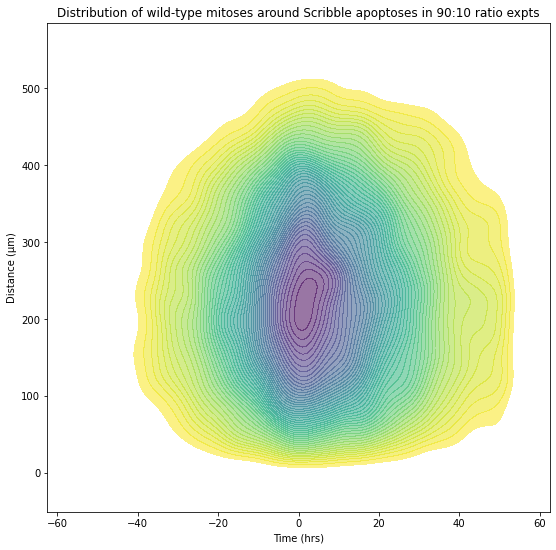

In [46]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    cumu_df['Time (hrs)'], 
    cumu_df['Distance (μm)'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
ax.set_title('Distribution of wild-type mitoses around Scribble apoptoses in 90:10 ratio expts')

# Control measures

In [2]:
dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/'

In [3]:
files = glob.glob(os.path.join(dirname, '*events*.csv'))

In [4]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0797_Pos18_wt2027_N_events_wtdiv_rad_1600_t_range_1600_focal_t_636.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0795_Pos3_wt1086_N_events_wtdiv_rad_1600_t_range_1600_focal_t_811.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt97_N_events_wtdiv_rad_1600_t_range_1600_focal_t_181.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0794_Pos8_wt876_N_events_wtdiv_rad_1600_t_range_1600_focal_t_877.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0798_Pos3_wt548_N_events_wtdiv_rad_1600_t_range_1600_focal_t_514.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/control_ninety_ten/GV0796_Pos20_wt1154_N_events_wtdiv_rad_1600_t_range

In [5]:
cumu_df = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files):
    df = pd.read_csv(file)
    df.columns= ['Cell ID', 'Distance', 'Time']
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    cumu_df.append(df)
cumu_df = pd.concat(cumu_df, axis = 0, ignore_index = True)

  0%|          | 0/1775 [00:00<?, ?it/s]

<ipython-input-5-5f134d9acb67>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-5-5f134d9acb67>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [6]:
cumu_df['Time (hrs)'] = cumu_df['Time']*(4/60)
cumu_df['Distance (μm)'] = cumu_df['Distance']/3

In [7]:
cumu_df

,Cell ID,Distance,Time,Time (hrs),Distance (μm)
0,490,61,-44,-2.933333,20.333333
1,530,722,-5,-0.333333,240.666667
2,577,740,-15,-1.000000,246.666667
3,675,518,2,0.133333,172.666667
4,724,231,19,1.266667,77.000000
...,...,...,...,...,...
682154,5545,1320,64,4.266667,440.000000
682155,6167,1437,102,6.800000,479.000000
682156,6185,161,102,6.800000,53.666667
682157,6208,748,103,6.866667,249.333333


# Control KDE plot

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of wild-type divisions around random wild-type time points in 90:10 ratio expts')

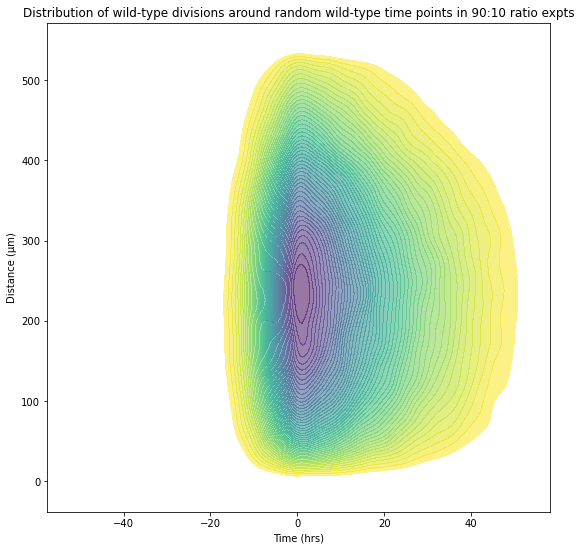

In [55]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    cumu_df['Time (hrs)'], 
    cumu_df['Distance (μm)'],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
ax.set_title('Distribution of wild-type divisions around random wild-type time points in 90:10 ratio expts')

Comment: can I get a better measure of the background rate of wild-type divisions? Can I just generate a long list of wild-type divisions without a focal point?

# Now measuring the number of cells around scr apoptoses

In [8]:
dirname = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten'

In [9]:
files = glob.glob(os.path.join(dirname, '*cells*.csv'))

In [10]:
files

['/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0801_Pos3_Scr-198_N_cells_wt_rad_1600_t_range_1600_focal_t_688.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0800_Pos3_Scr-65_N_cells_wt_rad_1600_t_range_1600_focal_t_1053.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0800_Pos15_Scr-7_N_cells_wt_rad_1600_t_range_1600_focal_t_848.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0802_Pos3_Scr-16_N_cells_wt_rad_1600_t_range_1600_focal_t_888.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0800_Pos8_Scr-75_N_cells_wt_rad_1600_t_range_1600_focal_t_546.csv',
 '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon_ninety_ten/GV0798_Pos8_Scr-8_N_cells_wt_rad_1600_t_range_1600_focal_t_816.csv',
 '/home/n

In [11]:
N_cells = []#pd.DataFrame([], columns=['Cell ID', 'Distance', 'Time'])
for file in tqdm(files):
    df = pd.read_csv(file)
    df.columns= ['Cell ID', 'Distance', 'Time']
    ### tidy up dataframe
    df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
    df['Time'] = df['Time'].str.replace('[()]', '')
    df = df.astype(int)
    ### normalise time
    apop_time = int(re.search('t_(\d+)', file).group(1))
    df['Time'] = df['Time'] - apop_time
    N_cells.append(df)
N_cells = pd.concat(N_cells, axis = 0, ignore_index = True)

  0%|          | 0/129 [00:00<?, ?it/s]

<ipython-input-11-3b3a5e221104>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-11-3b3a5e221104>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [12]:
N_cells['Time (hrs)'] = N_cells['Time']*(4/60)
N_cells['Distance (μm)'] = N_cells['Distance']/3

In [15]:
len(N_cells)/40

1146203.525

### Number of cells around scr apoptoses (cropped for memory)

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of wild-type cells around Scribble apoptoses in 90:10 ratio expts')

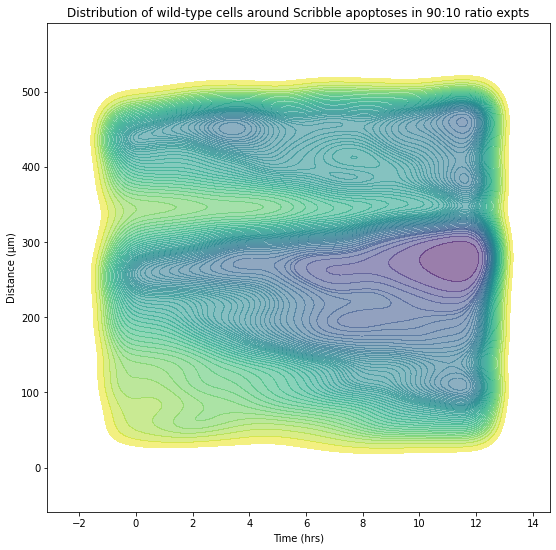

In [18]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Generate and add KDE with a shading of 50 gradients 
# coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    N_cells['Time (hrs)'][0:100000], 
    N_cells['Distance (μm)'][0:100000],
    n_levels=50, 
    shade=True,
    alpha=0.55, 
    cmap='viridis_r'
)
ax.set_title('Distribution of wild-type cells around Scribble apoptoses in 90:10 ratio expts')

# Bounding boxes, centrography and tendency

In [15]:
from pointpats import centrography

In [158]:
## cumulative df of mitoses around scr apop
cumu_df

,Cell ID,Distance,Time,Time (hrs),Distance (μm)
0,19,788,-516,-34.400000,262.666667
1,20,901,-533,-35.533333,300.333333
2,23,766,-367,-24.466667,255.333333
3,24,445,-294,-19.600000,148.333333
4,2,926,-591,-39.400000,308.666667
...,...,...,...,...,...
474495,3309,1195,508,33.866667,398.333333
474496,3414,511,521,34.733333,170.333333
474497,3425,1114,519,34.600000,371.333333
474498,3433,1110,531,35.400000,370.000000


In [159]:
# defining cropped df as working example
# defining x and y as time and distance
db['x'] = cumu_df['Time (hrs)']
db['y'] = cumu_df['Distance (μm)']

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [16]:
mean_center = centrography.mean_center(cumu_df[['Time (hrs)', 'Distance (μm)']])
med_center = centrography.euclidean_median(cumu_df[['Time (hrs)', 'Distance (μm)']])

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


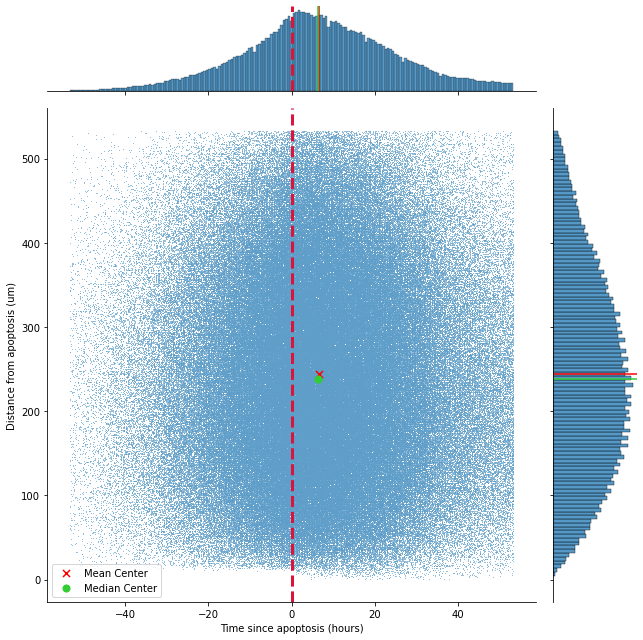

In [168]:
# Generate scatter plot
joint_axes = seaborn.jointplot(
    x='Time (hrs)', y ='Distance (μm)', data=cumu_df, s=0.75, height=9
)
# Add mean point and marginal lines
joint_axes.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
joint_axes.ax_marg_x.axvline(mean_center[0], color='red')
joint_axes.ax_marg_y.axhline(mean_center[1], color='red')
# Add median point and marginal lines
joint_axes.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
joint_axes.ax_marg_x.axvline(med_center[0], color='limegreen')
joint_axes.ax_marg_y.axhline(med_center[1], color='limegreen')
# Legend
joint_axes.ax_joint.legend()

joint_axes.ax_joint.set_xlabel('Time since apoptosis (hours)')
joint_axes.ax_joint.set_ylabel('Distance from apoptosis (um)')
# Add basemap
# contextily.add_basemap(
#     joint_axes.ax_joint, 
#     source=contextily.providers.CartoDB.Positron
#)
for ax in (joint_axes.ax_joint, joint_axes.ax_marg_x):
    ax.axvline(0, color='crimson', ls='--', lw=3)

# Clean axes
#joint_axes.ax_joint.set_axis_off()
# Display
plt.show()

In [12]:
db = cumu_df

In [13]:
db['x'] = cumu_df['Time (hrs)']
db['y'] = cumu_df['Distance (μm)']

In [17]:
centrography.std_distance(db[['x','y']])

117.43483398023488

In [18]:
major, minor, rotation = centrography.ellipse(db[['x','y']])

/home/nathan/analysis/miniconda3/envs/cellx/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


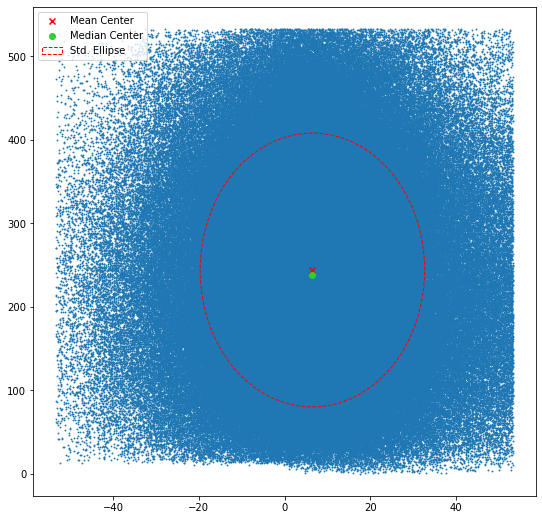

In [176]:
from matplotlib.patches import Ellipse

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot photograph points
ax.scatter(db['x'], db['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = np.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', linestyle='--',
                  label='Std. Ellipse')
ax.add_patch(ellipse)

ax.legend()
# Display
# Add basemap
# contextily.add_basemap(
#     ax, 
#     source=contextily.providers.CartoDB.Positron
# )
plt.show()

In [20]:
coordinates = db[['x','y']].values

In [21]:
convex_hull_vertices = centrography.hull(coordinates)

In [23]:
import libpysal
alpha_shape, alpha, circs = libpysal.cg.alpha_shape_auto(coordinates[0:1000], return_circles=True)
### dont really get the following graph

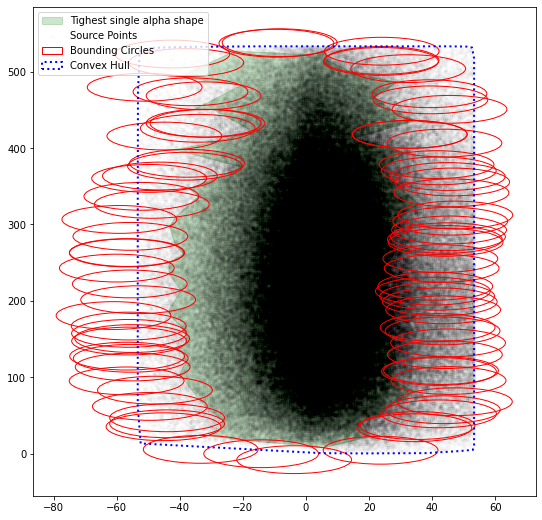

In [26]:
from descartes import PolygonPatch #to plot the alpha shape easily
f,ax = plt.subplots(1,1, figsize=(9,9))

# Plot a green alpha shape
ax.add_patch(
    PolygonPatch(
        alpha_shape, 
        edgecolor='green', 
        facecolor='green', 
        alpha=.2, 
        label = 'Tighest single alpha shape'
    )
)

# Include the points for our prolific user in black
ax.scatter(
    *coordinates.T, color='k', marker='.', label='Source Points', alpha =.01
)

# plot the circles forming the boundary of the alpha shape
for i, circle in enumerate(circs):
    # only label the first circle of its kind
    if i == 0:
        label = 'Bounding Circles'
    else:
        label = None
    ax.add_patch(
        plt.Circle(
            circle, 
            radius=alpha, 
            facecolor='none', 
            edgecolor='r', 
            label=label
        )
    )

# add a blue convex hull
ax.add_patch(
    plt.Polygon(
        convex_hull_vertices, 
        closed=True, 
        edgecolor='blue', 
        facecolor='none', 
        linestyle=':', 
        linewidth=2,
        label='Convex Hull'
    )
)

# # Add basemap
# contextily.add_basemap(
#     ax, 
#     source=contextily.providers.CartoDB.Positron
# )

plt.legend();

# Poisson distribution again

(Back to non-KDE stuff)

In [79]:
fn = '/home/nathan/data/results/radial_analysis_output/follow/raw_lists/1600.1600/canon/GV0796_Pos7_Scr-5_N_events_wtdiv_rad_1600_t_range_1600_focal_t_204.csv'

In [91]:
df = pd.read_csv(fn)
print(df)

       (80   681.24   477)
0      (79   645.20   262)
1      (78  1123.05    79)
2      (77  1006.30   213)
3      (75   895.46    97)
4      (73  1115.29   132)
..     ...      ...    ...
875  (3934   473.37   940)
876  (4061   766.85   970)
877  (4066  1450.89   963)
878  (4085   440.03   986)
879  (4184  1392.31   982)

[880 rows x 3 columns]


In [92]:
df.columns= ['Cell ID', 'Distance', 'Time']

In [93]:
### tidy up dataframe
df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
df['Time'] = df['Time'].str.replace('[()]', '')
df = df.astype(int)
df['Time'] = df['Time'] - 204

<ipython-input-93-048debe1c6ee>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Cell ID'] = df['Cell ID'].str.replace('[()]', '')
<ipython-input-93-048debe1c6ee>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Time'] = df['Time'].str.replace('[()]', '')


In [94]:
df

,Cell ID,Distance,Time
0,79,645,58
1,78,1123,-125
2,77,1006,9
3,75,895,-107
4,73,1115,-72
...,...,...,...
875,3934,473,736
876,4061,766,766
877,4066,1450,759
878,4085,440,782


In [28]:
from pointpats import distance_statistics, random
#from pointpats import distance_statistics, QStatistic, random, PointPattern

In [69]:
crop_df = cumu_df[0:100000]

In [95]:
### will this work with xt not xy?
coordinates = df[['Time', 
                       'Distance']].values 

In [96]:
coordinates

array([[  58,  645],
       [-125, 1123],
       [   9, 1006],
       ...,
       [ 759, 1450],
       [ 782,  440],
       [ 778, 1392]])

In [97]:
len(coordinates)

880

In [98]:
random_pattern = random.poisson(coordinates, size=len(coordinates))

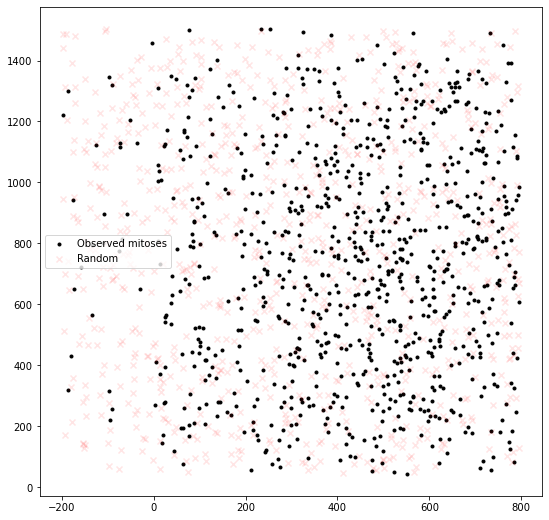

In [99]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed mitoses')
plt.scatter(*random_pattern.T, color='r', marker='x', label='Random', alpha = 0.1)
# contextily.add_basemap(
#     ax, 
#     source=contextily.providers.CartoDB.Positron
# )
ax.legend(ncol=1, loc='center left')
plt.show()

#### cumulatively too

In [10]:
### will this work with xt not xy?
coordinates = cumu_df[['Time', 
                       'Distance']].values 

In [11]:
coordinates

array([[-516,  788],
       [-533,  901],
       [-367,  766],
       ...,
       [ 519, 1114],
       [ 531, 1110],
       [ 525,  624]])

In [12]:
len(coordinates)

474500

In [38]:
random_pattern = random.poisson(coordinates, size=len(coordinates))

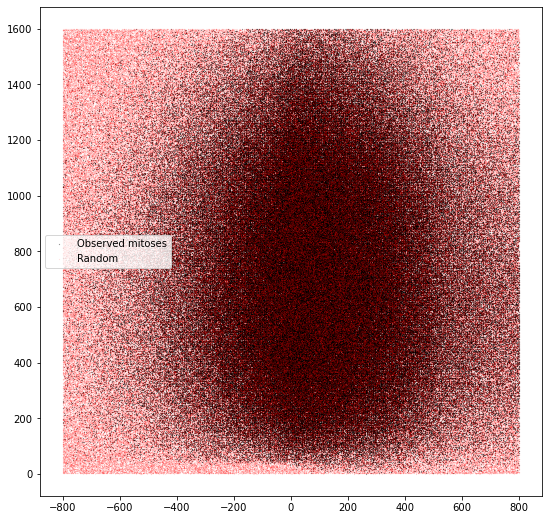

In [156]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed mitoses', s = 0.1)
plt.scatter(*random_pattern.T, color='r', marker='x', label='Random', alpha = 0.1, s = 0.1)
# contextily.add_basemap(
#     ax, 
#     source=contextily.providers.CartoDB.Positron
# )
ax.legend(ncol=1, loc='center left')
plt.show()
#lol

In [29]:
random_pattern_ashape = random.poisson(alpha_shape, size=len(coordinates))

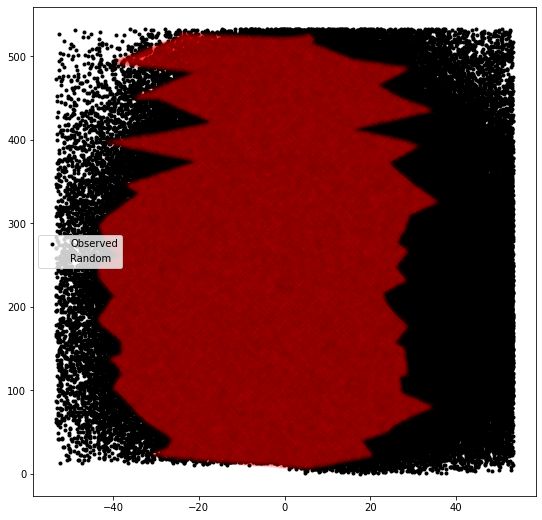

In [33]:
f,ax = plt.subplots(1, figsize=(9, 9))
plt.scatter(*coordinates.T, color='k', marker='.', label='Observed')
plt.scatter(*random_pattern_ashape.T, color='r', marker='x', label='Random', alpha = 0.01)
# contextily.add_basemap(
#     ax, 
#     source=contextily.providers.CartoDB.Positron
# )
ax.legend(ncol=1, loc='center left')
plt.show()

In [13]:
from pointpats import distance_statistics, QStatistic, random, PointPattern


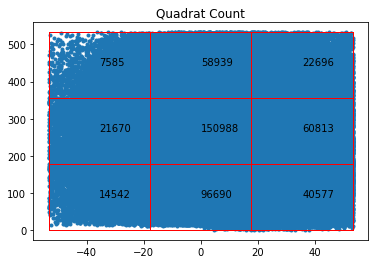

In [35]:
qstat = QStatistic(coordinates)
qstat.plot()

In [36]:
qstat.chi2_pvalue

0.0

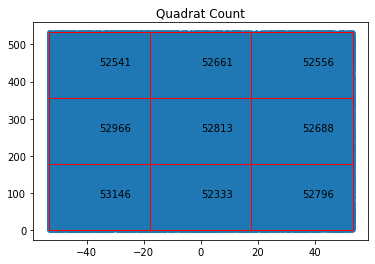

In [39]:
qstat_null = QStatistic(random_pattern)
qstat_null.plot()

In [40]:
qstat_null.chi2_pvalue


0.3502236027432186

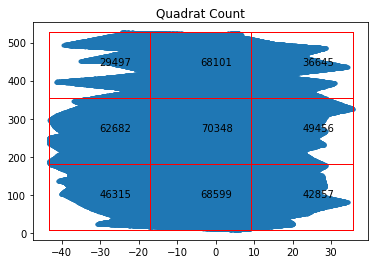

In [41]:
qstat_null_ashape = QStatistic(random_pattern_ashape)
qstat_null_ashape.plot()

In [42]:
qstat_null_ashape.chi2_pvalue

0.0

# Ripley's G function

In [ ]:
%%timeit
g_test = distance_statistics.g_test(
    coordinates, support=40, keep_simulations=True
)

In [ ]:
f,ax = plt.subplots(1,2,figsize=(9,3), 
                    gridspec_kw=dict(width_ratios=(6,3)))
# plot all the simulations with very fine lines
ax[0].plot(g_test.support, g_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(g_test.support, np.median(g_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's G function
ax[0].plot(g_test.support, g_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest neighbor\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $G(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()

# Ripley's F function

In [ ]:
f_test = distance_statistics.f_test(
    coordinates, support=40, keep_simulations=True
)

In [ ]:
f,ax = plt.subplots(
    1,2,figsize=(9,3), gridspec_kw=dict(width_ratios=(6,3))
)

# plot all the simulations with very fine lines
ax[0].plot(f_test.support, f_test.simulations.T, color='k', alpha=.01)
# and show the average of simulations
ax[0].plot(f_test.support, np.median(f_test.simulations, axis=0), color='cyan', 
         label='median simulation')


# and the observed pattern's F function
ax[0].plot(f_test.support, f_test.statistic, label = 'observed', color='red')

# clean up labels and axes
ax[0].set_xlabel('distance')
ax[0].set_ylabel('% of nearest point in pattern\ndistances shorter')
ax[0].legend()
ax[0].set_xlim(0,2000)
ax[0].set_title(r"Ripley's $F(d)$ function")

# plot the pattern itself on the next frame
ax[1].scatter(*coordinates.T)

# and clean up labels and axes there, too
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_xticklabels([])
ax[1].set_yticklabels([])
ax[1].set_title('Pattern')
f.tight_layout()
plt.show()